In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from multiprocessing import *
import os
from matplotlib.ticker import StrMethodFormatter
import scipy
from pathos.multiprocessing import ProcessingPool as Pool

import sys
from IPython.display import clear_output

import DarkNews
from DarkNews import const 
from analysis_dn import fit_functions as ff
from analysis_dn import hist_plot
from DarkNews.GenLauncher import GenLauncher
from analysis_dn import analysis as a
from analysis_dn import analysis_decay as a_d
from analysis_dn import decayer

# 1. Set general parameters for fitting

### Path and Grid

In [3]:
# PATH
path = 'results/3p2_couplings_e_e-2/'
path_data = path + f'chi2_fit_3p2_couplings.dat'
path_data_sbn = path + f'chi2_fit_3p2_couplings_sbn.dat'
mzprimearray = [0.2, 0.5, 1.25]
deltaarray = [0.5,3.0]

In [4]:
ud4_def = 1.0/np.sqrt(2.)
ud5_def = 1.0/np.sqrt(2.)
gD_def = 2.
umu4_def = np.sqrt(1.0e-12)
umu5_def = np.sqrt(1.0e-12)
epsilon_def = 1e-2

v54 = gD_def * ud5_def * ud4_def
vmu5_def = gD_def * ud5_def * (umu4_def*ud4_def + umu5_def*ud5_def) / np.sqrt(1 - umu4_def**2 - umu5_def**2)

epsilon = 1e-2
def vmu5_f(umu4,umu5):
    return gD_def * ud5_def * (umu4*ud4_def + umu5*ud5_def) / np.sqrt(1 - umu4**2 - umu5**2)

r_eps = epsilon / epsilon_def


vmui_max = 1e-3
v_cut = vmu5_f(vmui_max,vmui_max)

# 2. Plots

In [5]:
from matplotlib import cm
import matplotlib.patches as mpatches
from matplotlib import ticker

## Dirac, 3+2, light

### Enu, $\Delta$ = 3, $m_{Z'}$ = 1.25 GeV

In [6]:
z_case = 2
d_case = 1
delta = deltaarray[d_case]
mzprime = mzprimearray[z_case]

coup_factor = 1e5
coup_factor_string = r'$10^{-13}$'

data_enu = pd.read_csv(path_data,sep='\t')
data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')

data_enu_a = pd.read_csv(path_data,sep='\t')
data_enu_b = pd.read_csv(path_data,sep='\t')
data_enu_a = data_enu_a[(data_enu_a.m5 < 5./3.)]
data_enu_b = data_enu_b[(data_enu_b.m5 > 5./3.)]

data_enu = data_enu[(data_enu.mzprime == mzprime) & (data_enu.delta == delta)]
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime) & (data_enu_sbn.delta == delta)]
data_enu_a = data_enu_a[(data_enu_a.mzprime == mzprime) & (data_enu_a.delta == delta)]
data_enu_b = data_enu_b[(data_enu_b.mzprime == mzprime) & (data_enu_b.delta == delta)]

plot_path_jpg = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.pdf'

viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m5'].values, min_enu['v_mu5'].values
ymin_enu *= ymin_enu * coup_factor

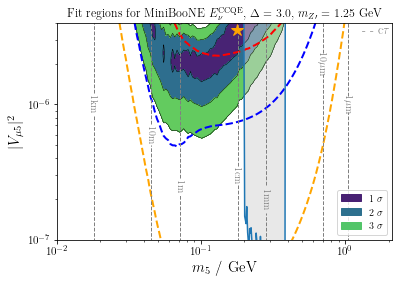

<Figure size 432x288 with 0 Axes>

In [15]:
icarus_factor = (47./60.)**2
sbnd_factor = 1 #/ 0.01482412

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

X = data_enu.m5.values
Y = data_enu.v_mu5.values
Y = Y * Y * coup_factor
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values

X2 = data_enu_sbn.m5.values
Y2 = data_enu_sbn.v_mu5.values
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values * sbnd_factor

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu5_f(UmuNSQR,UmuNSQR) * vmu5_f(UmuNSQR,UmuNSQR) * coup_factor

#X_a = data_enu_a.m5.values
#Y_a = data_enu_a.couplings.values
#Y_a = Y_a * Y_a * coup_factor
#W_a = data_enu_a.decay_length.values

#X_b = data_enu_b.m5.values
#Y_b = data_enu_b.couplings.values
#Y_b = Y_b * Y_b * coup_factor
#W_b = data_enu_b.decay_length.values

#X_c = data_enu_c.m5.values
#Y_c = data_enu_c.couplings.values
#Y_c = Y_c * Y_c * coup_factor
#W_c = data_enu_c.decay_length.values

xlabel = r'$m_5 \ /$ GeV'
ylabel = r'$|V_{\mu 5}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)

limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels = [0.0001,0.001,0.1,1,100,1000,100000,10000000]
dict_lev = {0.0001: r'1$\mu$m',0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}


dec_levels_b = [1e-1,1,1000,100000,10000000]
dict_lev_b = {1e-1:r'1mm',1: r'1cm',1000: r'10m',100000:r'1km',10000000:r'100km'}

test = 1e-1
#dec_levels_b = [test]
#dict_lev_b = {test: r'test'}
testc = 1e-2
#dec_levels_c = [testc]
#dict_lev_c = {testc: r'0.1mm'}
dict_lev_d = {testc: r'    '}


pos = 7
posb = 1
posc = 1
decay = plt.tricontour(X,Y,W,levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')
decay4 = plt.tricontour(X,Y,W,levels=[dec_levels[3]],colors='gray',linewidths=1.0,linestyles='dashed')
decay5 = plt.tricontour(X,Y,W,levels=[dec_levels[4]],colors='gray',linewidths=1.0,linestyles='dashed')
decay6 = plt.tricontour(X,Y,W,levels=[dec_levels[5]],colors='gray',linewidths=1.0,linestyles='dashed')
decay7 = plt.tricontour(X,Y,W,levels=[dec_levels[6]],colors='gray',linewidths=1.0,linestyles='dashed')

#decay = plt.tricontour(X_a,Y_a,W_a,levels=dec_levels[:pos],colors='gray',linewidths=1.0,linestyles='dashed')
#decay_b = plt.tricontour(X_b,Y_b,W_b,levels=dec_levels_b[:posb],colors='gray',linewidths=1.0,linestyles='dashed')
#decay_c = plt.tricontour(X_c,Y_c,W_c,levels=dec_levels_c[:posc],colors='gray',linewidths=1.0,linestyles='dashed')


plt.text(1.3, 0.33, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
#plt.plot(xmin_angle,ymin_angle,color='orange',marker=marker2,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + rf'$\Delta = $ {delta}, ' + r'$m_{Z\prime} =$ ' + rf'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(1.1,0.1),(0.7,0.2),(0.28,0.02),(0.18,0.03),(0.071,0.025),(0.042,0.06),(0.012,0.1)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-8,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-10,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-8,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay4, decay4.levels, inline=True, inline_spacing=-7,manual=[positions[3]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay5, decay5.levels, inline=True, inline_spacing=-5,manual=[positions[4]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay6, decay6.levels, inline=True, inline_spacing=-7,manual=[positions[5]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay7, decay7.levels, inline=True, inline_spacing=-7,manual=[positions[6]], use_clabeltext=True,fmt=dict_lev, fontsize=10)

plt.xlim(X.min(),X.max()*1.05)
#plt.ylim(Y.min(),Y.max())
plt.ylim(1e-2,Y.max())
yt = 10.**np.arange(-2,0)
yl = [r'$10^{-7}$',r'$10^{-6}$']
plt.yticks(ticks=yt,labels=yl)

plt.savefig(plot_path_jpg,dpi=400)
#plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()

### Enu, $\Delta$ = 3, $m_{Z'}$ = 500 MeV

In [16]:
z_case = 1
d_case = 1
delta = deltaarray[d_case]
mzprime = mzprimearray[z_case]

coup_factor = 1e6
coup_factor_string = r'$10^{-13}$'

data_enu = pd.read_csv(path_data,sep='\t')
data_enu_a = pd.read_csv(path_data,sep='\t')
data_enu_b = pd.read_csv(path_data,sep='\t')
data_enu_a = data_enu_a[(data_enu_a.m5 < 5./3.)]
data_enu_b = data_enu_b[(data_enu_b.m5 > 5./3.)]

data_enu = data_enu[(data_enu.mzprime == mzprime) & (data_enu.delta == delta)]
data_enu_a = data_enu_a[(data_enu_a.mzprime == mzprime) & (data_enu_a.delta == delta)]
data_enu_b = data_enu_b[(data_enu_b.mzprime == mzprime) & (data_enu_b.delta == delta)]

data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime) & (data_enu_sbn.delta == delta)]


plot_path_jpg = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.pdf'

viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m5'].values, min_enu['v_mu5'].values
ymin_enu *= ymin_enu * coup_factor

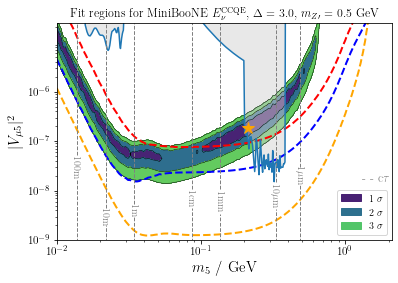

<Figure size 432x288 with 0 Axes>

In [18]:
icarus_factor = (47./60.)**2
sbnd_factor = 1 #/ 0.01482412

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

X = data_enu.m5.values
Y = data_enu.v_mu5.values
Y = Y * Y * coup_factor
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values

X2 = data_enu_sbn.m5.values
Y2 = data_enu_sbn.v_mu5.values
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values * sbnd_factor

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu5_f(UmuNSQR,UmuNSQR) * vmu5_f(UmuNSQR,UmuNSQR) * coup_factor

#X_a = data_enu_a.m5.values
#Y_a = data_enu_a.couplings.values
#Y_a = Y_a * Y_a * coup_factor
#W_a = data_enu_a.decay_length.values

#X_b = data_enu_b.m5.values
#Y_b = data_enu_b.couplings.values
#Y_b = Y_b * Y_b * coup_factor
#W_b = data_enu_b.decay_length.values

#X_c = data_enu_c.m5.values
#Y_c = data_enu_c.couplings.values
#Y_c = Y_c * Y_c * coup_factor
#W_c = data_enu_c.decay_length.values

xlabel = r'$m_5 \ /$ GeV'
ylabel = r'$|V_{\mu 5}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)
    
limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels = [0.0001,0.001,0.1,1,100,1000,10000,10000000]
dict_lev = {0.0001: r'1$\mu$m',0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',10000:r'100m',10000000:r'100km'}


dec_levels_b = [1e-1,1,1000,100000,10000000]
dict_lev_b = {1e-1:r'1mm',1: r'1cm',1000: r'10m',100000:r'1km',10000000:r'100km'}

test = 1e-1
#dec_levels_b = [test]
#dict_lev_b = {test: r'test'}
testc = 1e-2
#dec_levels_c = [testc]
#dict_lev_c = {testc: r'0.1mm'}
dict_lev_d = {testc: r'    '}


pos = 7
posb = 1
posc = 1
decay = plt.tricontour(X,Y,W,levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')
decay4 = plt.tricontour(X,Y,W,levels=[dec_levels[3]],colors='gray',linewidths=1.0,linestyles='dashed')
decay5 = plt.tricontour(X,Y,W,levels=[dec_levels[4]],colors='gray',linewidths=1.0,linestyles='dashed')
decay6 = plt.tricontour(X,Y,W,levels=[dec_levels[5]],colors='gray',linewidths=1.0,linestyles='dashed')
decay7 = plt.tricontour(X,Y,W,levels=[dec_levels[6]],colors='gray',linewidths=1.0,linestyles='dashed')

plt.text(1.3, 0.015, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
#plt.plot(xmin_angle,ymin_angle,color='orange',marker=marker2,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + rf'$\Delta = $ {delta}, ' + r'$m_{Z\prime} =$ ' + rf'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(0.48,0.02),(0.32,0.008),(0.15,0.006),(0.08,0.007),(0.031,0.004),(0.022,0.003),(0.012,0.03),(0.015,0.05)]
positions2 = [(1.8,0.16),(0.9,1.),(0.5,0.6),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions3 = [(1.3, 23),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions4 = [(1.2,1),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions5 = [(1.12,4500),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-4,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-4,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-3,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay4, decay4.levels, inline=True, inline_spacing=-3,manual=[positions[3]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay5, decay5.levels, inline=True, inline_spacing=-3,manual=[positions[4]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay6, decay6.levels, inline=True, inline_spacing=-4,manual=[positions[5]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay7, decay7.levels, inline=True, inline_spacing=-4,manual=[positions[6]], use_clabeltext=True,fmt=dict_lev, fontsize=10)

plt.xlim(X.min(),X.max()*1.05)
#plt.ylim(Y.min(),Y.max())
plt.ylim(1e-3,Y.max())
yt = 10.**np.arange(-3,1)
yl = [r'$10^{-9}$',r'$10^{-8}$',r'$10^{-7}$',r'$10^{-6}$']
plt.yticks(ticks=yt,labels=yl)

plt.savefig(plot_path_jpg,dpi=400)
#plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()

### Enu, $\Delta$ = 3, $m_{Z'}$ = 200 MeV

In [19]:
z_case = 0
d_case = 1
delta = deltaarray[d_case]
mzprime = mzprimearray[z_case]

coup_factor = 1e8
coup_factor_string = r'$10^{-13}$'

data_enu = pd.read_csv(path_data,sep='\t')
data_enu_a = pd.read_csv(path_data,sep='\t')
data_enu_b = pd.read_csv(path_data,sep='\t')
data_enu_a = data_enu_a[(data_enu_a.m5 < 5./3.)]
data_enu_b = data_enu_b[(data_enu_b.m5 > 5./3.)]

data_enu = data_enu[(data_enu.mzprime == mzprime) & (data_enu.delta == delta)]
data_enu_a = data_enu_a[(data_enu_a.mzprime == mzprime) & (data_enu_a.delta == delta)]
data_enu_b = data_enu_b[(data_enu_b.mzprime == mzprime) & (data_enu_b.delta == delta)]

data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime) & (data_enu_sbn.delta == delta)]

plot_path_jpg = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.pdf'

viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m5'].values, min_enu['v_mu5'].values
ymin_enu *= ymin_enu * coup_factor

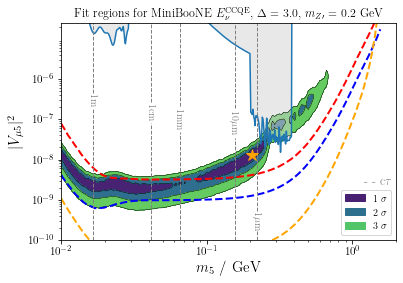

<Figure size 432x288 with 0 Axes>

In [21]:
icarus_factor = (47./60.)**2
sbnd_factor = 1 #/ 0.01482412

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

X = data_enu.m5.values
Y = data_enu.v_mu5.values
Y = Y * Y * coup_factor
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values

X2 = data_enu_sbn.m5.values
Y2 = data_enu_sbn.v_mu5.values
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values * sbnd_factor

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu5_f(UmuNSQR,UmuNSQR) * vmu5_f(UmuNSQR,UmuNSQR) * coup_factor

#X_a = data_enu_a.m5.values
#Y_a = data_enu_a.couplings.values
#Y_a = Y_a * Y_a * coup_factor
#W_a = data_enu_a.decay_length.values

#X_b = data_enu_b.m5.values
#Y_b = data_enu_b.couplings.values
#Y_b = Y_b * Y_b * coup_factor
#W_b = data_enu_b.decay_length.values

#X_c = data_enu_c.m5.values
#Y_c = data_enu_c.couplings.values
#Y_c = Y_c * Y_c * coup_factor
#W_c = data_enu_c.decay_length.values

xlabel = r'$m_5 \ /$ GeV'
ylabel = r'$|V_{\mu 5}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)
    
limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels = [0.0001,0.001,0.1,1,100,1000,10000000,10000000]
dict_lev = {0.0001: r'1$\mu$m',0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',10000000:r'100km',10000000:r'100km'}


dec_levels_b = [1e-1,1,1000,100000,10000000]
dict_lev_b = {1e-1:r'1mm',1: r'1cm',1000: r'10m',100000:r'1km',10000000:r'100km'}

test = 1e-1
#dec_levels_b = [test]
#dict_lev_b = {test: r'test'}
testc = 1e-2
#dec_levels_c = [testc]
#dict_lev_c = {testc: r'0.1mm'}
dict_lev_d = {testc: r'    '}


pos = 5
posb = 1
posc = 1
decay = plt.tricontour(X,Y,W,levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')
decay4 = plt.tricontour(X,Y,W,levels=[dec_levels[3]],colors='gray',linewidths=1.0,linestyles='dashed')
decay5 = plt.tricontour(X,Y,W,levels=[dec_levels[4]],colors='gray',linewidths=1.0,linestyles='dashed')


plt.text(1.2, 0.24, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
#plt.plot(xmin_angle,ymin_angle,color='orange',marker=marker2,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + rf'$\Delta = $ {delta}, ' + r'$m_{Z\prime} =$ ' + rf'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(0.22,0.03),(0.15,8),(0.065,10),(0.041,15),(0.014,30),(0.02,170),(0.01,0.1),(0.015,0.05)]
positions2 = [(1.8,0.16),(0.9,1.),(0.5,0.6),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions3 = [(1.3, 23),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions4 = [(1.2,1),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions5 = [(1.12,4500),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-2,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-1,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-1,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay4, decay4.levels, inline=True, inline_spacing=-1,manual=[positions[3]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay5, decay5.levels, inline=True, inline_spacing=-1,manual=[positions[4]], use_clabeltext=True,fmt=dict_lev, fontsize=10)

plt.xlim(X.min(),X.max())
#plt.ylim(Y.min(),Y.max())
plt.ylim(1e-2,Y.max())
yt = 10.**np.arange(-2,3)
yl = [r'$10^{-10}$',r'$10^{-9}$',r'$10^{-8}$',r'$10^{-7}$',r'$10^{-6}$']
plt.yticks(ticks=yt,labels=yl)

plt.savefig(plot_path_jpg,dpi=400)
#plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()

### Enu, $\Delta$ = 0.5, $m_{Z'}$ = 1.25 GeV

In [22]:
z_case = 2
d_case = 0
delta = deltaarray[d_case]
mzprime = mzprimearray[z_case]

coup_factor = 1e6
coup_factor_string = r'$10^{-13}$'

data_enu = pd.read_csv(path_data,sep='\t')
data_enu_a = pd.read_csv(path_data,sep='\t')
data_enu_b = pd.read_csv(path_data,sep='\t')
data_enu_a = data_enu_a[(data_enu_a.m5 < 5./3.)]
data_enu_b = data_enu_b[(data_enu_b.m5 > 5./3.)]

data_enu = data_enu[(data_enu.mzprime == mzprime) & (data_enu.delta == delta)]
data_enu_a = data_enu_a[(data_enu_a.mzprime == mzprime) & (data_enu_a.delta == delta)]
data_enu_b = data_enu_b[(data_enu_b.mzprime == mzprime) & (data_enu_b.delta == delta)]

data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime) & (data_enu_sbn.delta == delta)]

plot_path_jpg = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.pdf'

viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m5'].values, min_enu['v_mu5'].values
ymin_enu *= ymin_enu * coup_factor

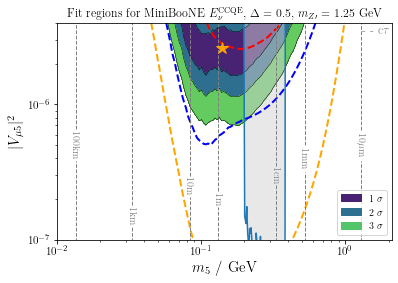

<Figure size 432x288 with 0 Axes>

In [24]:
icarus_factor = (47./60.)**2
sbnd_factor = 1 #/ 0.01482412

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

X = data_enu.m5.values
Y = data_enu.v_mu5.values
Y = Y * Y * coup_factor
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values

X2 = data_enu_sbn.m5.values
Y2 = data_enu_sbn.v_mu5.values
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values * sbnd_factor

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu5_f(UmuNSQR,UmuNSQR) * vmu5_f(UmuNSQR,UmuNSQR) * coup_factor

#X_a = data_enu_a.m5.values
#Y_a = data_enu_a.couplings.values
#Y_a = Y_a * Y_a * coup_factor
#W_a = data_enu_a.decay_length.values

#X_b = data_enu_b.m5.values
#Y_b = data_enu_b.couplings.values
#Y_b = Y_b * Y_b * coup_factor
#W_b = data_enu_b.decay_length.values

#X_c = data_enu_c.m5.values
#Y_c = data_enu_c.couplings.values
#Y_c = Y_c * Y_c * coup_factor
#W_c = data_enu_c.decay_length.values

xlabel = r'$m_5 \ /$ GeV'
ylabel = r'$|V_{\mu 5}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)

limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels = [0.001,0.1,1,100,1000,100000,10000000]
dict_lev = {0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}


dec_levels_b = [1e-1,1,1000,100000,10000000]
dict_lev_b = {1e-1:r'1mm',1: r'1cm',1000: r'10m',100000:r'1km',10000000:r'100km'}

test = 1e-1
#dec_levels_b = [test]
#dict_lev_b = {test: r'test'}
testc = 1e-2
#dec_levels_c = [testc]
#dict_lev_c = {testc: r'0.1mm'}
dict_lev_d = {testc: r'    '}


pos = 7
posb = 1
posc = 1
decay = plt.tricontour(X,Y,W,levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')
decay4 = plt.tricontour(X,Y,W,levels=[dec_levels[3]],colors='gray',linewidths=1.0,linestyles='dashed')
decay5 = plt.tricontour(X,Y,W,levels=[dec_levels[4]],colors='gray',linewidths=1.0,linestyles='dashed')
decay6 = plt.tricontour(X,Y,W,levels=[dec_levels[5]],colors='gray',linewidths=1.0,linestyles='dashed')
decay7 = plt.tricontour(X,Y,W,levels=[dec_levels[6]],colors='gray',linewidths=1.0,linestyles='dashed')


plt.text(1.3, 3.3, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
#plt.plot(xmin_angle,ymin_angle,color='orange',marker=marker2,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + rf'$\Delta = $ {delta}, ' + r'$m_{Z\prime} =$ ' + rf'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(1.4,0.5),(0.53,0.4),(0.32,0.3),(0.14,0.2),(0.081,0.25),(0.032,0.15),(0.013,0.5),(0.015,0.05)]
positions2 = [(1.8,0.16),(0.9,1.),(0.5,0.6),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions3 = [(1.3, 23),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions4 = [(1.2,1),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions5 = [(1.12,4500),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-9,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-8,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-7,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay4, decay4.levels, inline=True, inline_spacing=-5,manual=[positions[3]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay5, decay5.levels, inline=True, inline_spacing=-7,manual=[positions[4]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay6, decay6.levels, inline=True, inline_spacing=-7,manual=[positions[5]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay7, decay7.levels, inline=True, inline_spacing=-11,manual=[positions[6]], use_clabeltext=True,fmt=dict_lev, fontsize=10)

plt.xlim(X.min(),X.max()*1.05)
#plt.ylim(Y.min(),Y.max())
plt.ylim(1e-1,Y.max())
yt = 10.**np.arange(-1,1)
yl = [r'$10^{-7}$',r'$10^{-6}$']
plt.yticks(ticks=yt,labels=yl)

plt.savefig(plot_path_jpg,dpi=400)
#plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()

### Enu, $\Delta$ = 0.5, $m_{Z'}$ = 500 MeV

In [25]:
z_case = 1
d_case = 0
delta = deltaarray[d_case]
mzprime = mzprimearray[z_case]

coup_factor = 1e6
coup_factor_string = r'$10^{-13}$'

data_enu = pd.read_csv(path_data,sep='\t')
data_enu_a = pd.read_csv(path_data,sep='\t')
data_enu_b = pd.read_csv(path_data,sep='\t')
data_enu_a = data_enu_a[(data_enu_a.m5 < 5./3.)]
data_enu_b = data_enu_b[(data_enu_b.m5 > 5./3.)]

data_enu = data_enu[(data_enu.mzprime == mzprime) & (data_enu.delta == delta)]
data_enu_a = data_enu_a[(data_enu_a.mzprime == mzprime) & (data_enu_a.delta == delta)]
data_enu_b = data_enu_b[(data_enu_b.mzprime == mzprime) & (data_enu_b.delta == delta)]

data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime) & (data_enu_sbn.delta == delta)]

plot_path_jpg = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.pdf'

viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m5'].values, min_enu['v_mu5'].values
ymin_enu *= ymin_enu * coup_factor

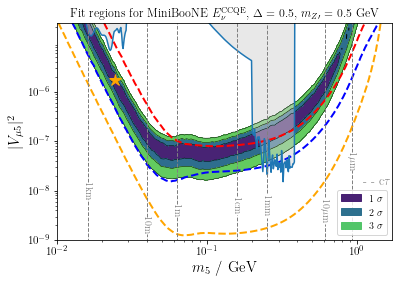

<Figure size 432x288 with 0 Axes>

In [27]:
icarus_factor = (47./60.)**2
sbnd_factor = 1 #/ 0.01482412

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

X = data_enu.m5.values
Y = data_enu.v_mu5.values
Y = Y * Y * coup_factor
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values

X2 = data_enu_sbn.m5.values
Y2 = data_enu_sbn.v_mu5.values
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values * sbnd_factor

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu5_f(UmuNSQR,UmuNSQR) * vmu5_f(UmuNSQR,UmuNSQR) * coup_factor

#X_a = data_enu_a.m5.values
#Y_a = data_enu_a.couplings.values
#Y_a = Y_a * Y_a * coup_factor
#W_a = data_enu_a.decay_length.values

#X_b = data_enu_b.m5.values
#Y_b = data_enu_b.couplings.values
#Y_b = Y_b * Y_b * coup_factor
#W_b = data_enu_b.decay_length.values

#X_c = data_enu_c.m5.values
#Y_c = data_enu_c.couplings.values
#Y_c = Y_c * Y_c * coup_factor
#W_c = data_enu_c.decay_length.values

xlabel = r'$m_5 \ /$ GeV'
ylabel = r'$|V_{\mu 5}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)

limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels = [0.0001,0.001,0.1,1,100,1000,100000,10000000]
dict_lev = {0.0001: r'1$\mu$m',0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}


dec_levels_b = [1e-1,1,1000,100000,10000000]
dict_lev_b = {1e-1:r'1mm',1: r'1cm',1000: r'10m',100000:r'1km',10000000:r'100km'}

test = 1e-1
#dec_levels_b = [test]
#dict_lev_b = {test: r'test'}
testc = 1e-2
#dec_levels_c = [testc]
#dict_lev_c = {testc: r'0.1mm'}
dict_lev_d = {testc: r'    '}


pos = 7
posb = 1
posc = 1
decay = plt.tricontour(X,Y,W,levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')
decay4 = plt.tricontour(X,Y,W,levels=[dec_levels[3]],colors='gray',linewidths=1.0,linestyles='dashed')
decay5 = plt.tricontour(X,Y,W,levels=[dec_levels[4]],colors='gray',linewidths=1.0,linestyles='dashed')
decay6 = plt.tricontour(X,Y,W,levels=[dec_levels[5]],colors='gray',linewidths=1.0,linestyles='dashed')
decay7 = plt.tricontour(X,Y,W,levels=[dec_levels[6]],colors='gray',linewidths=1.0,linestyles='dashed')


plt.text(1.1, 0.013, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
#plt.plot(xmin_angle,ymin_angle,color='orange',marker=marker2,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + rf'$\Delta = $ {delta}, ' + r'$m_{Z\prime} =$ ' + rf'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(0.94,0.04),(0.61,0.004),(0.26,0.005),(0.17,0.005),(0.065,0.004),(0.04,0.002),(0.015,0.01),(0.015,0.05)]
positions2 = [(1.8,0.16),(0.9,1.),(0.5,0.6),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions3 = [(1.3, 23),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions4 = [(1.2,1),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
positions5 = [(1.12,4500),(0.8,0.7),(0.025,12),(0.02,0.8),(0.013,0.05)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-4,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-4,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-3,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay4, decay4.levels, inline=True, inline_spacing=-3,manual=[positions[3]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay5, decay5.levels, inline=True, inline_spacing=-3,manual=[positions[4]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay6, decay6.levels, inline=True, inline_spacing=-4,manual=[positions[5]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay7, decay7.levels, inline=True, inline_spacing=-4,manual=[positions[6]], use_clabeltext=True,fmt=dict_lev, fontsize=10)

#plt.clabel(decay_b, decay_b.levels[:posb], inline=True, inline_spacing=3,manual=positions2[:posb], use_clabeltext=True,fmt=dict_lev_b, fontsize=10)
#plt.clabel(decay_b, decay_b.levels[:1], inline=True, inline_spacing=7,manual=positions3[:1], use_clabeltext=True,fmt=dict_lev_d, fontsize=10)
#plt.clabel(decay_c, decay_c.levels[:posc], inline=True, inline_spacing=3,manual=positions4[:posc], use_clabeltext=True,fmt=dict_lev_c, fontsize=10)
#plt.clabel(decay_c, decay_c.levels[:posc], inline=True, inline_spacing=7,manual=positions5[:posc], use_clabeltext=True,fmt=dict_lev_d, fontsize=10)

plt.xlim(X.min(),X.max()*0.85)
plt.ylim(1e-3,Y.max())
yt = 10.**np.arange(-3,1)
yl = [r'$10^{-9}$',r'$10^{-8}$',r'$10^{-7}$',r'$10^{-6}$']
plt.yticks(ticks=yt,labels=yl)

plt.savefig(plot_path_jpg,dpi=400)
#plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()

### Enu, $\Delta$ = 0.5, $m_{Z'}$ = 200 MeV

In [28]:
z_case = 0
d_case = 0
delta = deltaarray[d_case]
mzprime = mzprimearray[z_case]

coup_factor = 1e8
coup_factor_string = r'$10^{-13}$'

data_enu = pd.read_csv(path_data,sep='\t')
data_enu_a = pd.read_csv(path_data,sep='\t')
data_enu_b = pd.read_csv(path_data,sep='\t')
data_enu_a = data_enu_a[(data_enu_a.m5 < 5./3.)]
data_enu_b = data_enu_b[(data_enu_b.m5 > 5./3.)]

data_enu = data_enu[(data_enu.mzprime == mzprime) & (data_enu.delta == delta)]
data_enu_a = data_enu_a[(data_enu_a.mzprime == mzprime) & (data_enu_a.delta == delta)]
data_enu_b = data_enu_b[(data_enu_b.mzprime == mzprime) & (data_enu_b.delta == delta)]

data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime) & (data_enu_sbn.delta == delta)]

plot_path_jpg = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p2_couplings_mz_{mzprime}_delta_{delta}_sbn.pdf'

viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m5'].values, min_enu['v_mu5'].values
ymin_enu *= ymin_enu * coup_factor

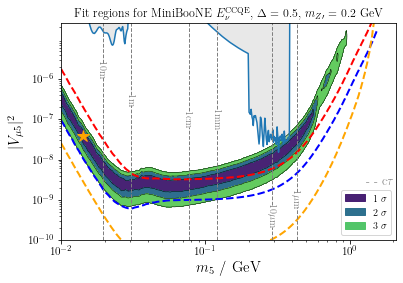

<Figure size 432x288 with 0 Axes>

In [30]:
icarus_factor = (47./60.)**2
sbnd_factor = 1 #/ 0.01482412

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

X = data_enu.m5.values
Y = data_enu.v_mu5.values
Y = Y * Y * coup_factor
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values

X2 = data_enu_sbn.m5.values
Y2 = data_enu_sbn.v_mu5.values
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values * sbnd_factor

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu5_f(UmuNSQR,UmuNSQR) * vmu5_f(UmuNSQR,UmuNSQR) * coup_factor


xlabel = r'$m_5 \ /$ GeV'
ylabel = r'$|V_{\mu 5}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)

limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels = [0.0001,0.001,0.1,1,100,1000,10000000,10000000]
dict_lev = {0.0001: r'1$\mu$m',0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',10000000:r'100km',10000000:r'100km'}


dec_levels_b = [1e-1,1,1000,100000,10000000]
dict_lev_b = {1e-1:r'1mm',1: r'1cm',1000: r'10m',100000:r'1km',10000000:r'100km'}

test = 1e-1
#dec_levels_b = [test]
#dict_lev_b = {test: r'test'}
testc = 1e-2
#dec_levels_c = [testc]
#dict_lev_c = {testc: r'0.1mm'}
dict_lev_d = {testc: r'    '}


pos = 6
decay = plt.tricontour(X,Y,W,levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')
decay4 = plt.tricontour(X,Y,W,levels=[dec_levels[3]],colors='gray',linewidths=1.0,linestyles='dashed')
decay5 = plt.tricontour(X,Y,W,levels=[dec_levels[4]],colors='gray',linewidths=1.0,linestyles='dashed')
decay6 = plt.tricontour(X,Y,W,levels=[dec_levels[5]],colors='gray',linewidths=1.0,linestyles='dashed')

plt.text(1.3, 0.24, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
#plt.plot(xmin_angle,ymin_angle,color='orange',marker=marker2,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + rf'$\Delta = $ {delta}, ' + r'$m_{Z\prime} =$ ' + rf'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(0.43,0.1),(0.3,0.04),(0.11,10),(0.08,10),(0.03,30),(0.02,170),(0.01,0.1),(0.015,0.05)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-4,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-4,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-3,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay4, decay4.levels, inline=True, inline_spacing=-3,manual=[positions[3]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay5, decay5.levels, inline=True, inline_spacing=-3,manual=[positions[4]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay6, decay6.levels, inline=True, inline_spacing=-4,manual=[positions[5]], use_clabeltext=True,fmt=dict_lev, fontsize=10)


plt.xlim(X.min(),X.max()*1.05)
plt.ylim(1e-2,Y.max())
yt = 10.**np.arange(-2,3)
yl = [r'$10^{-10}$',r'$10^{-9}$',r'$10^{-8}$',r'$10^{-7}$',r'$10^{-6}$']
plt.yticks(ticks=yt,labels=yl)

plt.savefig(plot_path_jpg,dpi=400)
#plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()